# Imports:

In [ ]:
from sklearn import datasets
import numpy as np
from collections import Counter
import matplotlib
import pylab as pl
from itertools import cycle
from sklearn import naive_bayes
import random
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Exploration de données:

In [ ]:
# Lire le jeu de données
irisData = datasets.load_iris()

In [ ]:
# Afficher les attributs et les classes associées
print(irisData.data)
print(irisData.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [ ]:
# Afficher les noms des attributs 
irisData.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
# Afficher les noms des classes
irisData.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
 # Afficher le nombre de données dans chaque classe de deux façons

In [ ]:
# 1ère méthode
Counter(irisData.target)

Counter({0: 50, 1: 50, 2: 50})

In [ ]:
# 2ème méthode
np.unique(irisData.target, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

In [ ]:
# Afficher la classe et les attributs du 32ème échantillon
print(irisData.data[31])
print(irisData.target[31])

[5.4 3.4 1.5 0.4]
0


In [ ]:
def plot_2D(data, target, target_names):
  colors = cycle('rgbcmykw') # cycle de couleurs
  target_ids = range(len(target_names))
  pl.figure()
  for i, c, label in zip(target_ids, colors, target_names):
    pl.scatter(data[target == i, 2], data[target == i, 3], c=c, label=label)
  # une droite qui permet de séparer une classe des deux autres
  pl.plot([2.5, 2.5], [0,3])
  pl.legend()
  pl.show()
  


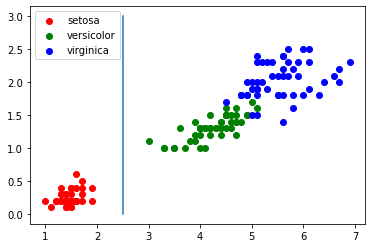

In [ ]:
plot_2D(irisData.data, irisData.target, irisData.target_names)

# Modélisation:

In [ ]:
from sklearn import naive_bayes
nb = naive_bayes.MultinomialNB(fit_prior = True)
nb.fit(irisData.data[:], irisData.target[:])
p31 = nb.predict([irisData.data[31]])
plast = nb.predict([irisData.data[-1]])

In [ ]:
print(p31)
print(plast)

[0]
[2]


In [ ]:
# Le modèle ne connait pas la classe 2 donc il ne va pas pouvoir la prédire
# Pour équilibrer l'ensemble de train et test on peut utiliser train_test_split avec l'argument stratify
nb = naive_bayes.MultinomialNB(fit_prior=True)
nb.fit(irisData.data[:99], irisData.target[:99])
nb.predict(irisData.data[100:149])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

# Evaluation: 

## Erreur du classifieur sur la totalité des données

In [ ]:
# 3 façons pour calculer l'erreur du classifier

In [ ]:
ea = 0
Y=irisData.target
P=nb.predict(irisData.data[:])
for i in range(len(irisData.data)):
  if (P[i] != Y[i]):
    print(i,irisData.data[i], Y[i], P[i])
    ea = ea+1
print(ea/len(irisData.data))

68 [6.2 2.2 4.5 1.5] 1 2
70 [5.9 3.2 4.8 1.8] 1 2
72 [6.3 2.5 4.9 1.5] 1 2
83 [6.  2.7 5.1 1.6] 1 2
129 [7.2 3.  5.8 1.6] 2 1
131 [7.9 3.8 6.4 2. ] 2 1
133 [6.3 2.8 5.1 1.5] 2 1
0.04666666666666667


In [ ]:
np.count_nonzero(P-Y)/len(irisData.data)

0.04666666666666667

In [ ]:
1-nb.score(irisData.data, irisData.target)

0.046666666666666634

## Division train/test:

In [ ]:
import random
def split(X,y, ratio):
  total_indices = range(len(X))
  indices = random.sample(total_indices, int(ratio*len(X)) + 1)
  rest_indices = np.setdiff1d(total_indices, indices)
  X_train = X[indices]
  X_test = X[rest_indices]
  y_train = y[indices]
  y_test = y[rest_indices]
  return X_train, y_train, X_test, y_test


In [ ]:
X_train, y_train, X_test, y_test = split(irisData.data, irisData.target, ratio = 0.66)

In [ ]:
def test(X,y, clf):
  X_train, y_train, X_test, y_test = split(irisData.data, irisData.target, ratio = 0.66)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  return np.count_nonzero(y_test-y_pred)/len(X_test)

In [ ]:
# L'erreur est plus grande que celle trouvée precidemment et change chaque fois qu'on repète l'experience
nb = naive_bayes.MultinomialNB(fit_prior=True)
test(irisData.data, irisData.target, nb)

In [ ]:
# On remarque que l'erreur moyenne est d'autant plus stable lorsque la valeur de t augmente
for t in [10, 50, 100, 200, 500,1000]:
  print(" t = ", t)
  for j in range(20):
    sum_errors = 0
    for i in range(t):
      nb = naive_bayes.MultinomialNB(fit_prior=True)
      sum_errors+=test(irisData.data, irisData.target, nb)
    print(sum_errors/t)

 t =  10
0.166
0.246
0.152
0.19000000000000003
0.248
0.14800000000000002
0.18400000000000002
0.20400000000000001
0.122
0.21600000000000003
0.30000000000000004
0.24800000000000005
0.252
0.14800000000000002
0.17
0.16
0.172
0.178
0.142
0.21400000000000002
 t =  50
0.1968
0.2152
0.23199999999999993
0.1972
0.20159999999999997
0.20239999999999994
0.22559999999999988
0.18600000000000003
0.17519999999999986
0.18199999999999997
0.21119999999999997
0.18159999999999996
0.18919999999999995
0.21600000000000003
0.19440000000000002
0.222
0.19679999999999997
0.18040000000000003
0.21199999999999997
0.17679999999999996
 t =  100
0.1935999999999999
0.22619999999999993
0.21719999999999984
0.2187999999999999
0.1749999999999999
0.19019999999999992
0.19379999999999992
0.1856
0.18280000000000002
0.2163999999999999
0.19799999999999993
0.19179999999999997
0.20039999999999997
0.2119999999999999
0.20619999999999994
0.19319999999999993
0.17800000000000005
0.21439999999999998
0.2181999999999999
0.22719999999999985


In [ ]:
# In the case of a test set composed of one training example we get either 0 or 1 as error, in this case we got 0
# It is of course different than the one obtained earlier
nb = naive_bayes.MultinomialNB(fit_prior=True)
X_test = irisData.data[10]
y_test = irisData.target[10]
X_train = np.delete(irisData.data, 10 , axis = 0)
y_train = np.delete(irisData.target, 10, axis = 0)

nb.fit(X_train, y_train)
y_pred = nb.predict(X_test.reshape(1, -1))
print(abs(y_pred - y_test))

[0]


In [ ]:
# Utilisation de train_test_split de sklearn
errors_train_test_split = []
for test_size in [0.25,0.33,0.4]:
  X_train, X_test, y_train, y_test = train_test_split(irisData.data[:], irisData.target[:], test_size = test_size, stratify=irisData.target)
  nb.fit(X_train, y_train)
  y_pred = nb.predict(X_test)
  errors_train_test_split.append(np.count_nonzero(y_test-y_pred)/len(X_test))
print(errors_train_test_split)

[0.05263157894736842, 0.06, 0.016666666666666666]


## Cross-validation avec cross_val_score:

In [ ]:
for nfold in [3,5,8,10]:
  print("N° of folds : ", nfold, '\n', 1-cross_val_score(nb, irisData.data, irisData.target, cv = nfold))

N° of folds :  3 
 [0.04 0.08 0.04]
N° of folds :  5 
 [0.         0.03333333 0.1        0.1        0.        ]
N° of folds :  8 
 [0.         0.         0.05263158 0.10526316 0.10526316 0.15789474
 0.         0.        ]
N° of folds :  10 
 [0.         0.         0.         0.06666667 0.13333333 0.06666667
 0.2        0.         0.         0.        ]


In [ ]:
import pandas as pd

In [ ]:
errors_df = pd.DataFrame()

In [ ]:
errors_df['errors_train_test_split (0.25, 0.33 ,0.4):'] = errors_train_test_split

In [ ]:
errors_df['CV nfolds=5'] = 1-cross_val_score(nb, irisData.data, irisData.target, cv = 3)

In [ ]:
errors_df

,"errors_train_test_split (0.25, 0.33 ,0.4):",CV nfolds=5
0,0.052632,0.04
1,0.060000,0.08
2,0.016667,0.04


# Utilisation de DecisionTreeClassifier:

In [ ]:
tree = DecisionTreeClassifier()
errors_train_test_split = []
for test_size in [0.25,0.33,0.4]:
  X_train, X_test, y_train, y_test = train_test_split(irisData.data[:], irisData.target[:], test_size = test_size)
  tree.fit(X_train, y_train)
  y_pred = tree.predict(X_test)
  errors_train_test_split.append(np.count_nonzero(y_test-y_pred)/len(X_test))
print(errors_train_test_split)

[0.05263157894736842, 0.04, 0.03333333333333333]


In [ ]:
for nfold in [3,5,8,10]:
  print("N° of folds : ", nfold, '\n', 1-cross_val_score(tree, irisData.data, irisData.target, cv = nfold))

N° of folds :  3 
 [0.02 0.08 0.04]
N° of folds :  5 
 [0.03333333 0.03333333 0.1        0.03333333 0.        ]
N° of folds :  8 
 [0.         0.05263158 0.         0.10526316 0.10526316 0.
 0.05555556 0.        ]
N° of folds :  10 
 [0.         0.06666667 0.         0.06666667 0.06666667 0.13333333
 0.06666667 0.         0.         0.        ]


In [ ]:
errors_df = pd.DataFrame()
errors_df['errors_train_test_split (0.25, 0.33 ,0.4):'] = errors_train_test_split
errors_df['CV nfolds=3'] = 1-cross_val_score(tree, irisData.data, irisData.target, cv = 3)

In [ ]:
errors_df

,"errors_train_test_split (0.25, 0.33 ,0.4):",CV nfolds=3
0,0.052632,0.02
1,0.040000,0.08
2,0.033333,0.02
